# **Homework 10 - LSTM**
# KDD Tuesdays 12:30 PM - 2:45 PM
## Jake Brulato

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LSTM
from sklearn.preprocessing import MinMaxScaler

In [54]:
Google_train = pd.read_csv('Google_Stock_Price_Train.csv')
Google_test = pd.read_csv('Google_Stock_Price_Test.csv')
Google_train.head(5)


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [55]:
Google_train.tail(5)

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [56]:
Google_train.shape

(1258, 6)

In [57]:
training_set = Google_train.iloc[:, 4:5].values #close price
training_set = training_set.astype(str).reshape(-1)
training_set = np.array([float(x.replace(',', '')) for x in training_set])




In [58]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_training_set = scaler.fit_transform(training_set.reshape(-1, 1))
scaled_training_set


array([[0.23757287],
       [0.24151427],
       [0.22878051],
       ...,
       [0.40495845],
       [0.40184391],
       [0.38672602]])

In [62]:
# # Define the number of consecutive days
n_days = 45

# # Split the dataset into training and test sets
train_data = Google_train.iloc[:, 4:5].values #close price
train_data = train_data.astype(str).reshape(-1)
train_data = np.array([float(x.replace(',', '')) for x in train_data])

test_data = Google_test.iloc[:, 4:5].values #close price
test_data = test_data.astype(str).reshape(-1)
test_data = np.array([float(x.replace(',', '')) for x in test_data])

# # Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train_data = scaler.fit_transform(train_data.reshape(-1, 1))
test_data = scaler.transform(test_data.reshape(-1, 1))

# # Create sequences of consecutive days for training set
# train_sequences = []
# train_labels = []
# for i in range(n_days, len(train_data)):
#     train_sequences.append(train_data[i-n_days:i, 0])
#     train_labels.append(train_data[i, 0])

# # Create sequences of consecutive days for test set
# test_sequences = []
# for i in range(n_days, len(test_data)):
#     test_sequences.append(test_data[i-n_days:i, 0])



In [63]:
X_train = []
y_train = []
for i in range(n_days, len(train_data)):
    X_train.append(train_data[i-n_days:i, 0])
    y_train.append(train_data[i, 0])
X_train = np.array(X_train)
y_train = np.array(y_train)

In [67]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape


(1213, 45, 1)

In [69]:
model = Sequential()
model.add(LSTM(units=30, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.1))
model.add(LSTM(units=30, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(units=30, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(units=30))
model.add(Dropout(0.1))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=100, verbose=1)


Epoch 1/100
38/38 [==============================] - 7s 31ms/step - loss: 0.0244
Epoch 2/100
38/38 [==============================] - 1s 30ms/step - loss: 0.0093
Epoch 3/100
38/38 [==============================] - 1s 30ms/step - loss: 0.0080
Epoch 4/100
38/38 [==============================] - 1s 30ms/step - loss: 0.0068
Epoch 5/100
38/38 [==============================] - 1s 34ms/step - loss: 0.0064
Epoch 6/100
38/38 [==============================] - 1s 34ms/step - loss: 0.0059
Epoch 7/100
38/38 [==============================] - 1s 37ms/step - loss: 0.0059
Epoch 8/100
38/38 [==============================] - 1s 33ms/step - loss: 0.0057
Epoch 9/100
38/38 [==============================] - 1s 31ms/step - loss: 0.0047
Epoch 10/100
38/38 [==============================] - 1s 32ms/step - loss: 0.0047
Epoch 11/100
38/38 [==============================] - 1s 32ms/step - loss: 0.0056
Epoch 12/100
38/38 [==============================] - 1s 31ms/step - loss: 0.0048
Epoch 13/100
38/38 [=====

In [72]:
dataset_total = pd.concat((Google_train['Close'], Google_test['Close']), axis=0)
inputs = dataset_total[len(dataset_total) - len(Google_test) - n_days:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(n_days, n_days + len(Google_test)):
    X_test.append(inputs[i-n_days:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [73]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 1s/step


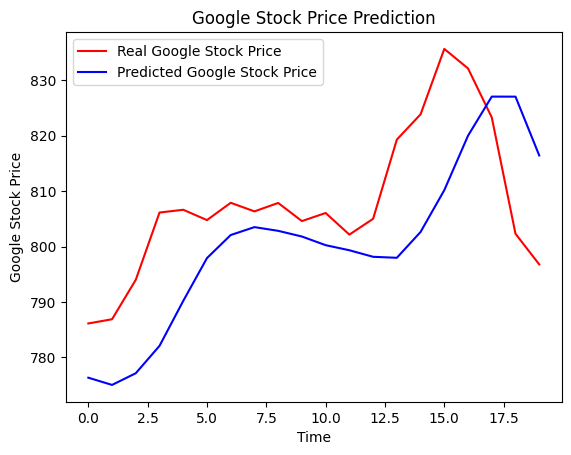

In [74]:
plt.plot(Google_test['Close'], color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()